# Test de Uniformidad y Aleatoriedad


###Importaciones


In [1]:
!pip install numpy

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random
import scipy as sp
import math
import scipy.stats as stats

###Generador Aletorio 


In [0]:
def get_numeros_aletorios(tam):
    """
    """
    datos = np.zeros(tam)
    for i in range(tam):
        datos[i] = random.random()
    return datos

### Kolmogorov-Smirnov

In [0]:
def kolmogorov (x_aleatorios):
  x_uniformes = np.arange(  1 / tam, 1 + 1 / tam, 1 / tam)
  valores_uniformes = [1.0] * tam

  y_aleatorios = np.cumsum(x_aleatorios / np.max(np.cumsum(x_aleatorios)))
  y_uniformes = np.cumsum(valores_uniformes / np.max(np.cumsum(valores_uniformes)))
  D = np.max(np.absolute(y_aleatorios - y_uniformes))

  print("D del generador con kolmogorov es: {}".format(D))

###Chi-Cuadrado

In [0]:
def chi_cuadrado(valores_aleatorios):

    frecuencias, bins, patches = plt.hist(valores_aleatorios, clases)
    plt.show()
    expectativa = tam / clases
    
    sumatoria = 0
    for value in frecuencias:
        cuadrado = (value - expectativa) ** 2
        division = cuadrado / expectativa
        sumatoria += division

    if(sumatoria > clases-1):
      print("Aceptado Chi_cuadrado")
    else:
      print("Rechazado Chi-Cuadrado")

    print(sumatoria)

##No Solapadas


In [0]:
def no_solapadas(valores_aleatorios):

  x_aleatorios = np.sort(valores_aleatorios)
  global tam
  global clases

  yi = []
  yi_2 = []
  oi = []
  aux = 0
  aux2 = 1/clases
  k = 1
  a = 0
  coma = ','
  esperado = 0
  contador = 0

  print(clases)
  for i in range(clases):
    while (a == 0): #cuando a = 1 es porque ya se encontró su clase y avanza el for
      if aux < x_aleatorios[i] and x_aleatorios[i] < aux2 :
        yi.append(k)
        k = 1
        if i%2 == 0: #Si es par, entonces unimos los valores con coma
          for j in range(2):        
              c = str(yi[i-1]) + coma + str(yi[i]) #Los que ya se han agregado
              yi_2.append(c)
        a = 1
      else:
        aux = aux + (1/clases)
        aux2 = aux2 + (1/clases)
        k = k + 1 

  #ahora encontramos cuántos hay repetidos y agregamos a Oi 
  
  for i in range(len(yi_2)):
    for j in range(len(yi_2)-1):
      if yi_2[i] == yi_2[j+1]:
        contador += 1 
    oi.append(contador)
  
  print("No Solapadas")
  chi_cuadrado(oi)
               

###Pruebas de Rachas

In [0]:
def test_rachas(valores_aleatorios):
  total_rachas = []
  for i in range(len(valores_aleatorios)-1):
    if valores_aleatorios[i] > valores_aleatorios[i+1]:
      total_rachas.append(0)
    elif valores_aleatorios[i] < valores_aleatorios[i+1]:
      total_rachas.append(1)

  R=1 
  for i in range(len(total_rachas)-1):
    if total_rachas[i]!=total_rachas[i+1]: 
      R+=1
    
  Z = (R - (2*tam-1)/float(3))/math.sqrt((16*tam-29)/float(90))
  print ("|Z|= ")
  print (np.absolute(Z),"\n")
  z=np.absolute(Z)
  
  if(z<1.960):
    print("Aceptada la prueba de rachas\n")
  else:
    print("Rechazada la prueba de rachas\n")


##PRUEBA CON GENERADOR RANDOM

In [0]:
def generador_random():

  valores_aleatorios = np.zeros(tam)
  valores_aleatorios = get_numeros_aletorios(tam)
  x_aleatorios = np.zeros(tam)
  x_aleatorios = np.sort(valores_aleatorios)

  chi_cuadrado(valores_aleatorios)
  kolmogorov(x_aleatorios)
  test_rachas(valores_aleatorios)

#TAMAÑO

In [0]:
tam = 100
clases = 20

###Generadores 

In [0]:
def randu(x):
    xi = x
    r = []
    for i in range(tam):
        xi = (65539*xi)%(2**31)
        
        r.append(float(xi)/(2**31))
    return r

def gSinclair(x):
    xi = x
    r = []
    for i in range(tam):
        xi = (75*xi)%((2**16)+1)
        r.append(float(xi)/((2**16)+1))
    return r

def numericalReciepies(x):
    xi = x
    r = []
    for i in range(tam):
        xi = (1664525*xi+1013904223)%(2**32)
        r.append(float(xi)/2**32)
    return r
def borland(x):
    xi = x
    r = []
    for i in range(tam):
        xi = (22695477*xi+1)%(2**32)
        r.append(float(xi)/2**32)
    return r

##PRUEBA CON GENERADORES



In [0]:
def generadores():
  semilla = 4

  print("Generador Randu")
  valores_aleatorios = np.zeros(tam)
  valores_aleatorios = randu(semilla)

  x_aleatorios = np.zeros(tam)
  x_aleatorios = np.sort(valores_aleatorios)

  test_rachas(valores_aleatorios)
  kolmogorov(x_aleatorios)
  chi_cuadrado(valores_aleatorios)
  no_solapadas(valores_aleatorios)

  print("Generador Sinclair")
  valores_aleatorios = np.zeros(tam)
  valores_aleatorios = gSinclair(semilla)

  x_aleatorios = np.zeros(tam)
  x_aleatorios = np.sort(valores_aleatorios)

  test_rachas(valores_aleatorios)
  kolmogorov(x_aleatorios)
  chi_cuadrado(valores_aleatorios)
  no_solapadas(valores_aleatorios)

  print("Generador Numerical Reciepes")
  valores_aleatorios = np.zeros(tam)
  valores_aleatorios = numericalReciepies(semilla)

  x_aleatorios = np.zeros(tam)
  x_aleatorios = np.sort(valores_aleatorios)

  test_rachas(valores_aleatorios)
  kolmogorov(x_aleatorios)
  chi_cuadrado(valores_aleatorios)
  no_solapadas(valores_aleatorios)

  print("Generador borland")
  valores_aleatorios = np.zeros(tam)
  valores_aleatorios = borland(semilla)

  x_aleatorios = np.zeros(tam)
  x_aleatorios = np.sort(valores_aleatorios)

  test_rachas(valores_aleatorios)
  kolmogorov(x_aleatorios)
  chi_cuadrado(valores_aleatorios)
  no_solapadas(valores_aleatorios)

#INICIO

Pruebas con generador Random


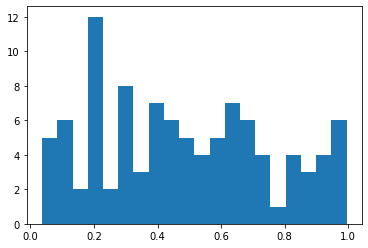

Aceptado Chi_cuadrado
23.2
D del generador con kolmogorov es: 0.2393994400457265
|Z|= 
0.6382662704186793 

Aceptada la prueba de rachas

Pruebas con generadores
Generador Randu
|Z|= 
0.07978328380233364 

Aceptada la prueba de rachas

D del generador con kolmogorov es: 0.29251095477205763


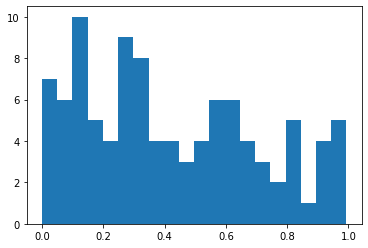

Aceptado Chi_cuadrado
19.2
20
No Solapadas


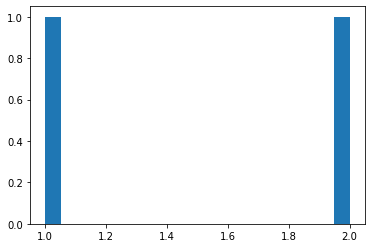

Aceptado Chi_cuadrado
96.4
Generador Sinclair
|Z|= 
0.07978328380233364 

Aceptada la prueba de rachas

D del generador con kolmogorov es: 0.21511232526572382


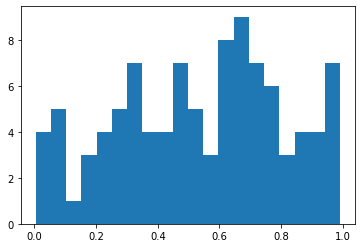

Rechazado Chi-Cuadrado
15.2
20
No Solapadas


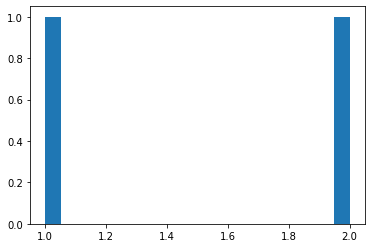

Aceptado Chi_cuadrado
96.4
Generador Numerical Reciepes
|Z|= 
0.398916419011675 

Aceptada la prueba de rachas

D del generador con kolmogorov es: 0.24127093077539535


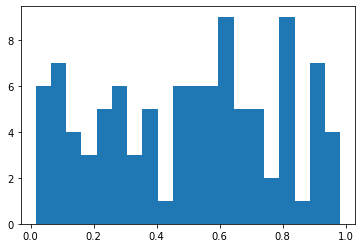

Aceptado Chi_cuadrado
19.2
20
No Solapadas


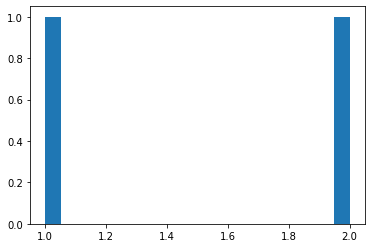

Aceptado Chi_cuadrado
96.4
Generador borland
|Z|= 
0.5584829866163423 

Aceptada la prueba de rachas

D del generador con kolmogorov es: 0.2504114011091192


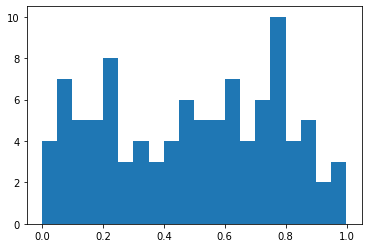

Rechazado Chi-Cuadrado
14.0
20
No Solapadas


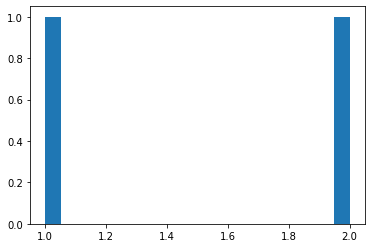

Aceptado Chi_cuadrado
96.4


In [11]:
print("Pruebas con generador Random")
generador_random()
print("Pruebas con generadores")
generadores()
